<a href="https://colab.research.google.com/github/brnorris03/notebooks/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Data explorations for COVID-19

The following is just for my own amusement, no guarantees of any sort are provided. 

In [2]:
import pandas as pd
from datetime import datetime as dt
import altair as alt

pd.options.mode.chained_assignment = None

# New York times data is summarized conveniently by county in github based on the 
# more detailed data at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
county_data = pd.read_csv(url)

In [3]:
def plot(county, state):
  charts = []
  for daily in (True, False):
    if daily:
      vals = ['cases-daily','deaths-daily']
      daily_or_total = 'Daily'
      angle=0
    else:
      daily_or_total = 'Total'
      vals = ['cases','deaths']
      angle=270
    thecounty = county_data[(county_data.state == state) & (county_data.county == county)]
    thecounty['realdate'] = pd.to_datetime(thecounty['date'])
    thecounty = thecounty.set_index(['realdate'])
    thecounty['cases-daily'] = (thecounty['cases'].shift(-1) - thecounty['cases']).shift(1)
    thecounty['deaths-daily'] = (thecounty['deaths'].shift(-1) - thecounty['deaths']).shift(1)
    thecounty = thecounty.loc['2020-03-01':] # not much data before then
    
    # Shorten dates
    thecounty['month-day']=thecounty.date.str.slice(6)

    # Plot daily cases and deaths
    base = alt.Chart(thecounty).mark_bar().transform_fold(
        fold=vals, 
        as_=['variable', 'value']
    ).encode(
        x='month-day',
        y='max(value):Q',
        color=alt.Color('variable:N', scale=alt.Scale(scheme='set2')),
        tooltip=['cases-daily', 'deaths-daily', 'cases', 'deaths']
    ).properties(width=900, title='%s County %s COVID-19 %s Cases and Deaths' % (county, state, daily_or_total))
    if daily: x,y=-5,-8
    else: x,y=8,0
    text1 = base.mark_text(align='left',baseline='middle',dx=x,dy=y,angle=angle,fontSize=8,binSpacing=1).encode(
        y=vals[1],text=vals[1],color=alt.value('black')
        )
    text2 = base.mark_text(align='left',baseline='middle',dx=x,dy=y,angle=angle,fontSize=8,binSpacing=1).encode(
        y=vals[0],text=vals[0],color=alt.value('black')
        )

    newchart = base.interactive() + text1 + text2
    charts.append(newchart)

  combined = alt.vconcat(charts[0],charts[1])
  combined.save('%s.html'% county)
  return charts

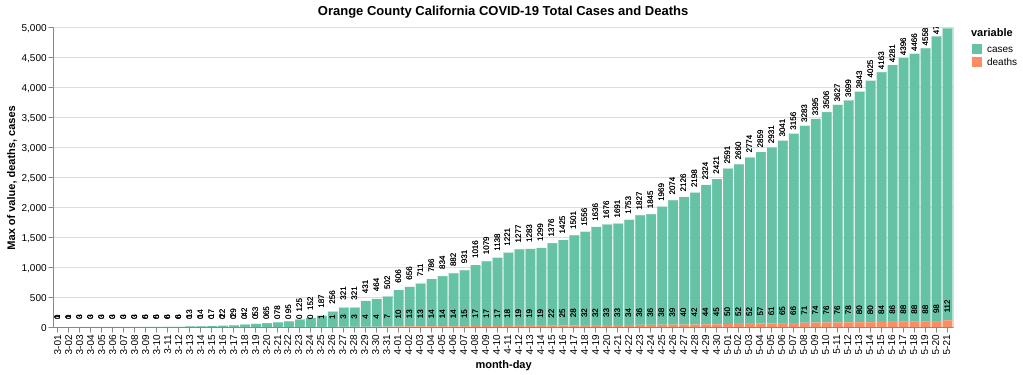

In [4]:
plot('Orange','California')[1]

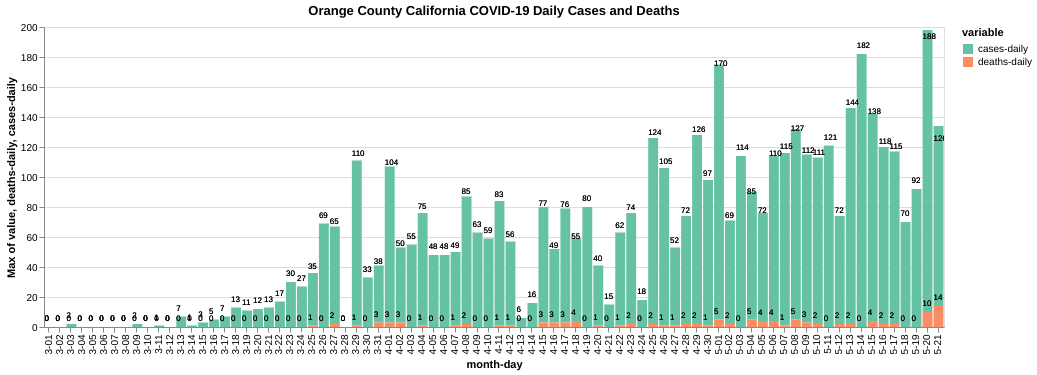

In [5]:
plot('Orange','California')[0]

In [6]:
counties = [('Lane','Oregon'),('Carteret','North Carolina'),('Orange','California')]
for county,state in counties:
  plot(county,state)

# Testing

In [ ]:
county = "county" #@param ["county"]
estates=pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

In [ ]:
#oregon[oregon.fips=='41039'].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
